### Data visualization of Time series data.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## zooming in 
* zooming in to a shorter period within the series can reveal patterns that are hidden  within a long series.



#### Moving Average plot
#### Scatter plot (lag scatter plot)
scatter plot show relationship between two variables...
The are mainly used to deduce the c...

In [4]:
df = pd.read_csv("daily-total-female-births-CA.csv", header=0, parse_dates=[0])
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


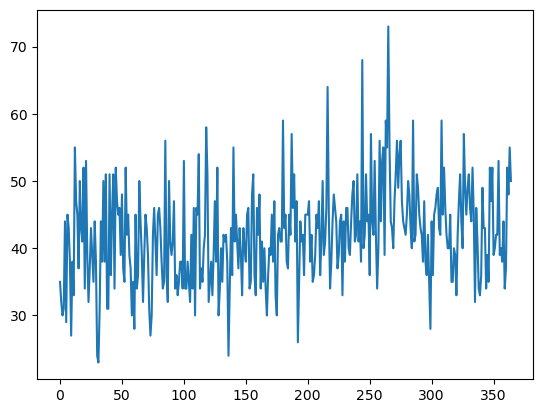

In [6]:
df['births'].plot()
plt.show()

In [7]:
# set the data as the index
df.index = df.date

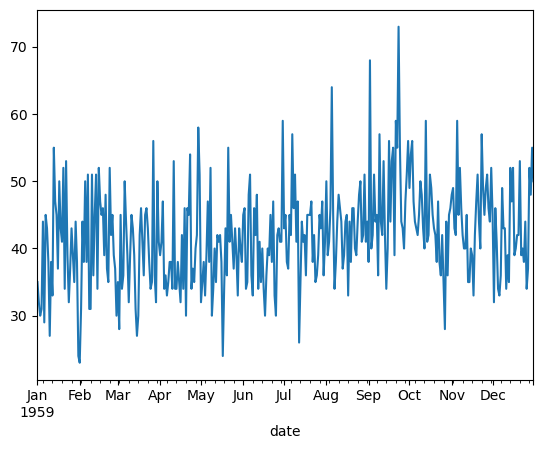

In [8]:
df['births'].plot()
plt.show()

## Zooming In

In [12]:
df2 = df[(df['date'] > '1959-01-01') & (df['date'] <='1959-01-10')].copy()

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 1959-01-02 to 1959-01-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9 non-null      datetime64[ns]
 1   births  9 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 216.0 bytes


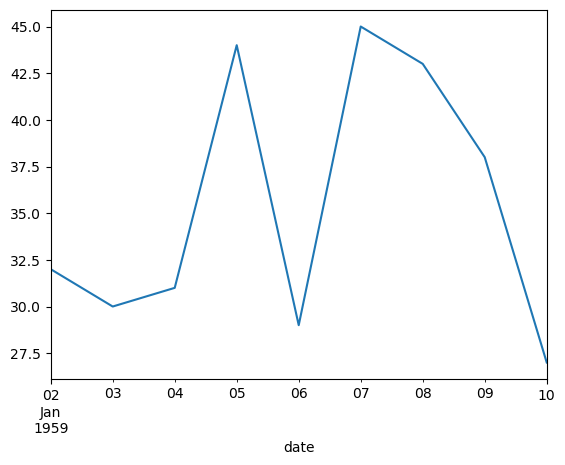

In [13]:
df2.births.plot()
plt.show()

#### Trendline

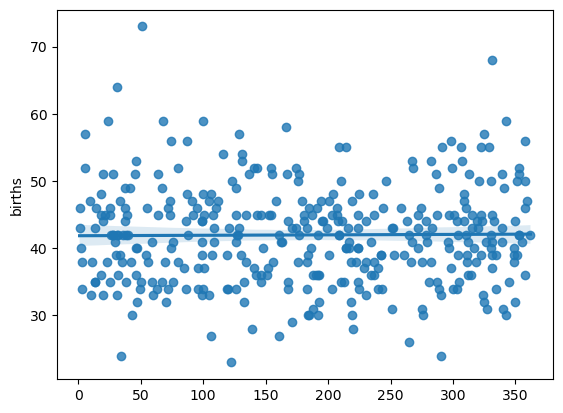

In [29]:
index_values = np.random.randint(0, 365, size=(len(df)))
sns.regplot(x=index_values, y=df['births'])
plt.show()

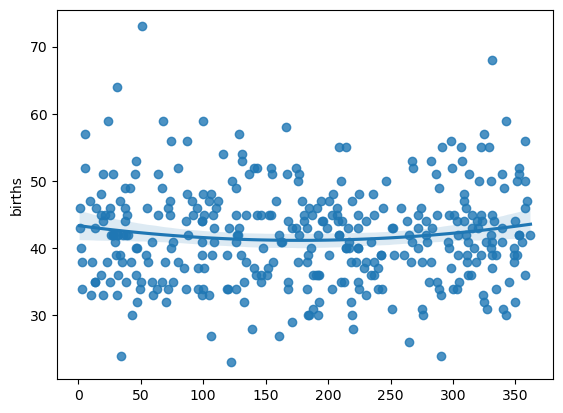

In [30]:
sns.regplot(x=index_values, y = df['births'], order=2)
plt.show()

In [31]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])
miles_df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [32]:
miles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


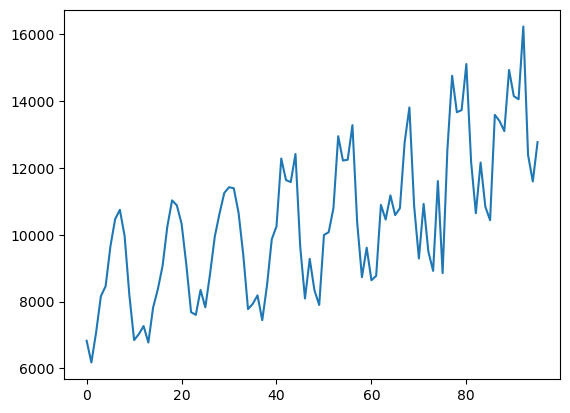

In [34]:
miles_df['MilesMM'].plot()
plt.show()

<Axes: ylabel='MilesMM'>

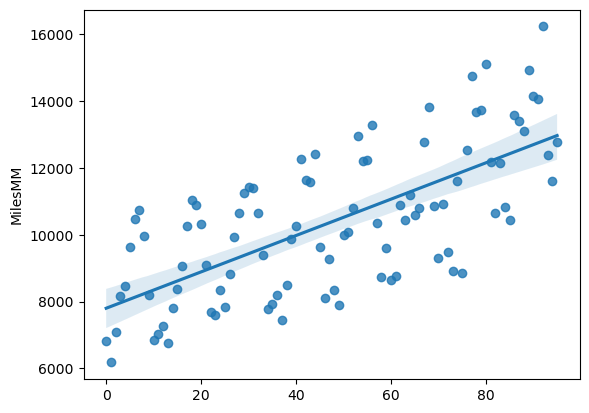

In [35]:
sns.regplot(x=miles_df.index.values, y=miles_df['MilesMM'])


## Removing Seasonality

In [36]:
miles_df['year'] = miles_df.Month.dt.year

In [37]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [38]:
miles_df.groupby('year')['MilesMM'].mean()
# we are grouping according to year.
# what values are we performing the operations on? the "MilesMM"

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

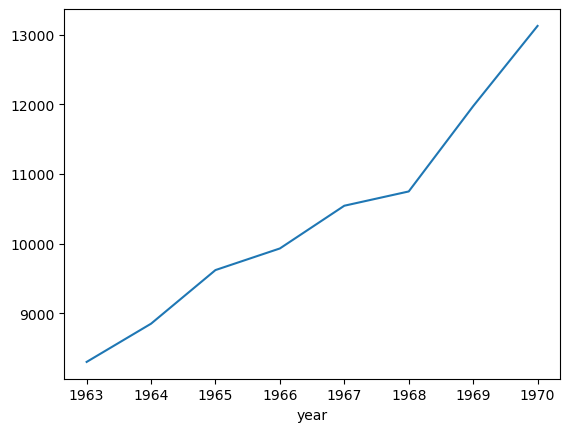

In [39]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag Plots

In [40]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [41]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

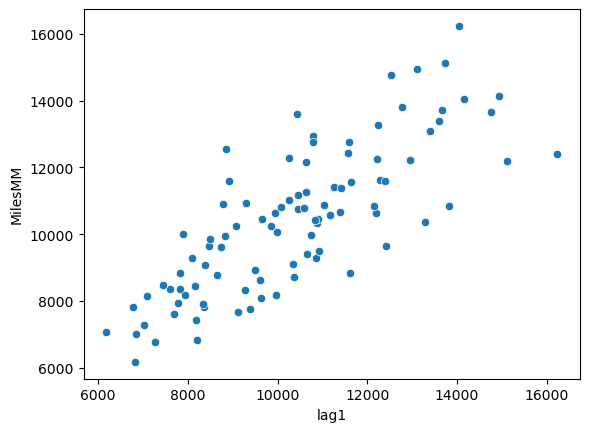

In [42]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])


In [43]:
from pandas.plotting import lag_plot


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

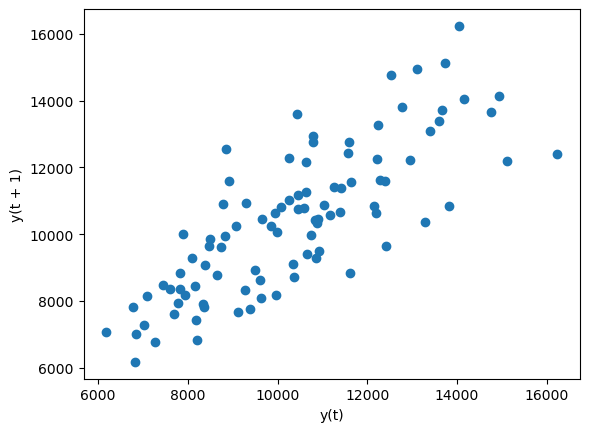

In [44]:
lag_plot(miles_df['MilesMM'])

### Auto Correlation Plots

In [45]:
from pandas.plotting import autocorrelation_plot

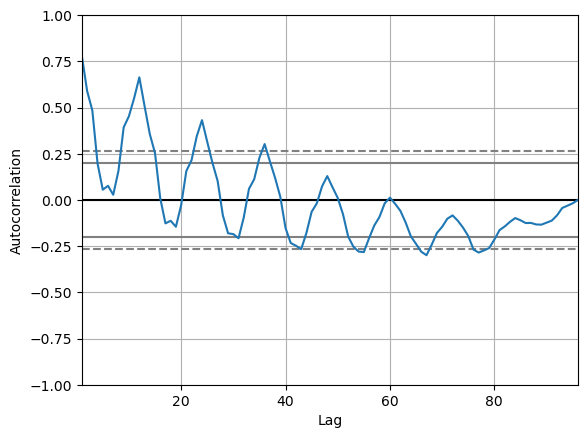

In [47]:
autocorrelation_plot(miles_df['MilesMM'])
plt.show()

### Power Transformation

### Moving Average
* What is ma smoothening? Why?
* Centered Window vs Trailing window MA
* Feature engineering and forecasting using MA
